## Ćwiczenie 1 (0,5 pkt)

Narysować wykres funkcji $L(\theta)$ dla $\theta\in[0,1]$. Zobaczyć, że maksimum jest w punkcie $\frac{7}{10}$.

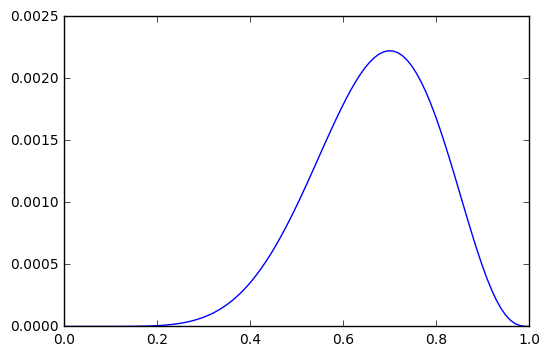

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

def L(theta):
    return theta**7 * (1-theta)**3

theta_grid = np.linspace(0,1,100)
L_values = L(theta_grid)
plt.plot(theta_grid, L_values)

## Ćwiczenie 2 (0,5 pkt)

Symulator "prawdziwej" monety.

Napisać funkcję flip_coin, która generuje wynik nb_flips rzutów monetą z prawdopodobieństwem wypadnięcia orła równym theta. Funkcja ma zwrócić tablicę zer i jedynek ($0$ - RESZKA, $1$ - ORZEŁ).


In [2]:
def flip_coin(theta, nb_flips):
    result = np.random.binomial(1, theta, nb_flips)
    
    assert len(result) == nb_flips
    return result

result = flip_coin(0.7, 1000)
sum(result)

723

## Ćwiczenie 3 (1 pkt)

Pierwszy model generatywny rzutu monetą.

Napisać klasę CoinML (Maximum Likelihood) posiadającą metody fit i toss:
- fit - przyjmuje listę obserwacji i oblicza self.theta korzystając z wzoru powyżej.
- toss - generuje jeden rzut monetą z prawdopodobieństwem self.theta i zwraca 0 lub 1.

In [3]:
class CoinML(object):

    def __init__(self):
        self.theta = None

    def fit(self, X):
        self.theta = sum(X) / len(X)

    def toss(self):
        return flip_coin(self.theta, 1)[0]
    
    
coin = CoinML()
result = flip_coin(0.7, 1000)

coin.fit(result)

coin.toss()

1

## Ćwiczenie 4 (1 pkt)

Napisać klasę CoinMAP (Maximum A Posteriori) posiadającą metody fit i toss:
- konstruktor - przyjmuje prior, który może np. być słownikiem (klucz - $\theta$, wartość - jej prawdopodobieństwo a priori),
- fit - przyjmuje listę obserwacji i uaktualnia self.knowledge, korzystając ze wzoru Bayesa, a następnie ustawia self.theta wybierając odpowiednią wartość z self.knowledge,
- toss - generuje jeden rzut monetą z prawdopodobieństwem self.theta i zwraca 0 lub 1.

In [4]:
class CoinMAP(object):

    def __init__(self, prior):
        self.knowledge = prior
        self.theta = 0
        
        max_probability = 0
        for key in prior:
            if prior[key] > max_probability:
                max_probability = prior[key]
                self.theta = key
        
    def fit(self, X):
        
        new_knowledge = {}
        heads = sum(X)
        tosses = len(X)
        
        p_B = 0
        
        for key in self.knowledge:
            p_B += key**heads * (1-key)**(tosses-heads) * self.knowledge[key]
        
        for key in self.knowledge:
            p_B_Ai = key**heads * (1-key)**(tosses-heads)
            p_Ai = self.knowledge[key]
            new_knowledge[key] = p_Ai * p_B_Ai / p_B
        
        self.knowledge = new_knowledge
        
        
        max_probability = 0
        for key in self.knowledge:
            if self.knowledge[key] > max_probability:
                max_probability = self.knowledge[key]
                self.theta = key

    def toss(self):
        return flip_coin(self.theta, 1)[0]


    
model = CoinMAP({0.5: 0.8, 0.6: 0.2})
model.fit(np.array([1,0,1,1,1,0,0,1,1,1]))
print ("model.knowledge powinno wyjść {0.5: 0.686, 0.6: 0.314}")
print (model.knowledge)
print ("Powinno wyjść 0.5:", model.theta)
print ("Powinno wyjść 1:", sum(model.knowledge.values()))

model = CoinMAP({0.5: 0.5, 0.6: 0.2, 0.8: 0.3})
model.fit(np.array([1,0,1,1,1,0,0,1,1,1]))
print ("model.knowledge powinno wyjść {0.5: 0.362, 0.6: 0.265, 0.8: 0.373}")
print (model.knowledge)
print ("Powinno wyjść 0.8:", model.theta)
print ("Powinno wyjść 1:", sum(model.knowledge.values()))

model.knowledge powinno wyjść {0.5: 0.686, 0.6: 0.314}
{0.5: 0.68556676315468579, 0.6: 0.31443323684531421}
Powinno wyjść 0.5: 0.5
Powinno wyjść 1: 1.0
model.knowledge powinno wyjść {0.5: 0.362, 0.6: 0.265, 0.8: 0.373}
{0.5: 0.36171237227008995, 0.6: 0.26543735345984282, 0.8: 0.37285027427006717}
Powinno wyjść 0.8: 0.8
Powinno wyjść 1: 1.0


## Ćwiczenie 5 (2 pkt)

Napisać klasę CoinBest, która działa jak CoinMAP z tą różnicą, że self.theta jest obliczane powyższym wzorem, a nie wybierane spośród wartości self.knowledge.

In [5]:
class CoinBest(object):

    def __init__(self, prior):
        self.knowledge = prior
        self.theta = 0
        
        self.theta = 0
        for key in self.knowledge:
            self.theta += key * self.knowledge[key]
        
    def fit(self, X):
        
        new_knowledge = {}
        heads = sum(X)
        tosses = len(X)
        
        p_B = 0
        
        for key in self.knowledge:
            p_B += key**heads * (1-key)**(tosses-heads) * self.knowledge[key]
        
        for key in self.knowledge:
            p_B_Ai = key**heads * (1-key)**(tosses-heads)
            p_Ai = self.knowledge[key]
            new_knowledge[key] = p_Ai * p_B_Ai / p_B
        
        self.knowledge = new_knowledge
        
        
        self.theta = 0
        for key in self.knowledge:
            self.theta += key * self.knowledge[key]

    def toss(self):
        return flip_coin(self.theta, 1)[0]

model = CoinBest({0.5: 0.8, 0.6: 0.2})
model.fit(np.array([1,0,1,1,1,0,0,1,1,1]))
print ("model.knowledge powinno wyjść {0.5: 0.686, 0.6: 0.314}")
print (model.knowledge)
print ("Powinno wyjść około 0.53:", model.theta)
print ("Powinno wyjść 1:", sum(model.knowledge.values()))

model = CoinBest({0.5: 0.5, 0.6: 0.2, 0.8: 0.3})
model.fit(np.array([1,0,1,1,1,0,0,1,1,1]))
print ("model.knowledge powinno wyjść {0.5: 0.362, 0.6: 0.265, 0.8: 0.373}")
print (model.knowledge)
print ("Powinno wyjść około 0.64:", model.theta)
print ("Powinno wyjść 1:", sum(model.knowledge.values()))

model.knowledge powinno wyjść {0.5: 0.686, 0.6: 0.314}
{0.5: 0.68556676315468579, 0.6: 0.31443323684531421}
Powinno wyjść około 0.53: 0.531443323685
Powinno wyjść 1: 1.0
model.knowledge powinno wyjść {0.5: 0.362, 0.6: 0.265, 0.8: 0.373}
{0.5: 0.36171237227008995, 0.6: 0.26543735345984282, 0.8: 0.37285027427006717}
Powinno wyjść około 0.64: 0.638398817627
Powinno wyjść 1: 1.0


## Ćwiczenie 6 (1 pkt)

Zasymulować metodą Monte Carlo przebieg rozgrywki dla gracza, który:
- nie zmienia bramki,
- zawsze zmienia bramkę,

w przypadku:
- zwykłym,
- z piorunem, a jeśli trafi w nagrodę to:
	- powtórka,
	- przegrana.

Wypisać średnią wygraną.

In [6]:
# Bez straty ogólności nagroda może być zawsze w bramce nr 1. Gracz wybiera losowo.
# Zdaję sobię sprawę że część operacji jest wykonywana niepotrzebnie. 
# Wykonuję je jednak dla zasady, przyjmując, że apriori nie mam pojęcia co ma znaczenie, a co nie.
liczba_gier = 100000

####Brak zmiany bramki:
##Zwykły przypadek:
wygrane = 0
for i in range (liczba_gier):
    wybor = np.argmax(np.random.multinomial(1, [1/3,1/3,1/3]))
    if wybor == 0:
        wygrane += 1
print("Procent wygranych w standardowym przypadku bez zmiany bramki: {0:.2f}%".format(100*wygrane/liczba_gier))

##Piorun z powtórką całej gry:
wygrane = 0
for i in range (liczba_gier):
    
    wybor = np.argmax(np.random.multinomial(1, [1/3,1/3,1/3]))
    prawd_pioruna = [1/2,1/2,1/2]
    prawd_pioruna[wybor] = 0
    wybor_pioruna = np.argmax(np.random.multinomial(1, prawd_pioruna))
    
    while (wybor_pioruna ==0):
        wybor = np.argmax(np.random.multinomial(1, [1/3,1/3,1/3]))
        prawd_pioruna = [1/2,1/2,1/2]
        prawd_pioruna[wybor] = 0
        wybor_pioruna = np.argmax(np.random.multinomial(1, prawd_pioruna))
    
    if wybor == 0:
        wygrane += 1
print("Procent wygranych w przypadku pioruna z powtórką bez zmiany bramki: {0:.2f}%".format(100*wygrane/liczba_gier))



##Piorun z przegraną:
wygrane = 0
for i in range (liczba_gier):
    
    wybor = np.argmax(np.random.multinomial(1, [1/3,1/3,1/3]))
    prawd_pioruna = [1/2,1/2,1/2]
    prawd_pioruna[wybor] = 0
    wybor_pioruna = np.argmax(np.random.multinomial(1, prawd_pioruna))
    
    if wybor == 0:
        wygrane += 1
print("Procent wygranych w przypadku pioruna z przegraną bez zmiany bramki: {0:.2f}%".format(100*wygrane/liczba_gier))  


####Zmiana bramki:
##Zwykły przypadek:
wygrane = 0
for i in range (liczba_gier):
    wybor = np.argmax(np.random.multinomial(1, [1/3,1/3,1/3]))
    if wybor != 0:
        wygrane += 1
print("Procent wygranych w standardowym przypadku ze zmianą bramki: {0:.2f}%".format(100*wygrane/liczba_gier))

##Piorun z powtórką całej gry:
wygrane = 0
for i in range (liczba_gier):
    
    wybor = np.argmax(np.random.multinomial(1, [1/3,1/3,1/3]))
    prawd_pioruna = [1/2,1/2,1/2]
    prawd_pioruna[wybor] = 0
    wybor_pioruna = np.argmax(np.random.multinomial(1, prawd_pioruna))
    
    while (wybor_pioruna ==0):
        wybor = np.argmax(np.random.multinomial(1, [1/3,1/3,1/3]))
        prawd_pioruna = [1/2,1/2,1/2]
        prawd_pioruna[wybor] = 0
        wybor_pioruna = np.argmax(np.random.multinomial(1, prawd_pioruna))
    
    if wybor != 0:
        wygrane += 1
print("Procent wygranych w przypadku pioruna z powtórką ze zmianą bramki: {0:.2f}%".format(100*wygrane/liczba_gier))



##Piorun z przegraną:
wygrane = 0
for i in range (liczba_gier):
    
    wybor = np.argmax(np.random.multinomial(1, [1/3,1/3,1/3]))
    prawd_pioruna = [1/2,1/2,1/2]
    prawd_pioruna[wybor] = 0
    wybor_pioruna = np.argmax(np.random.multinomial(1, prawd_pioruna))
    
    if wybor != 0 and wybor_pioruna!=0:
        wygrane += 1
print("Procent wygranych w przypadku pioruna z przegraną ze zmianą bramki: {0:.2f}%".format(100*wygrane/liczba_gier))  

Procent wygranych w standardowym przypadku bez zmiany bramki: 33.36%
Procent wygranych w przypadku pioruna z powtórką bez zmiany bramki: 50.15%
Procent wygranych w przypadku pioruna z przegraną bez zmiany bramki: 33.54%
Procent wygranych w standardowym przypadku ze zmianą bramki: 66.56%
Procent wygranych w przypadku pioruna z powtórką ze zmianą bramki: 50.03%
Procent wygranych w przypadku pioruna z przegraną ze zmianą bramki: 33.04%


## Ćwiczenie 7 (1 pkt)

Losujemy $k=100$ razy liczbę od $1$ do $m=200$ z rozkładem jednostajnym. Ile średnio różnych liczb wylosujemy?
Rozwiązać metodą Monte Carlo.

https://math.dartmouth.edu/archive/m19w03/public_html/Section6-5.pdf - czy wynik zgadza się z tw. 6.14?


In [7]:
def f(k, m, nb_simulations):
    avg_nb_integers = 0
    for i in range(nb_simulations):
        result = np.random.multinomial(k, np.ones(m)/m)
        avg_nb_integers += m - np.count_nonzero(result == 0)
    avg_nb_integers = avg_nb_integers / nb_simulations
    return avg_nb_integers

k = 100
m = 200
print ("{0} =?= {1}".format(f(k, m, nb_simulations=10000), m - (m * (1 - 1/float(m))**k)))

78.8264 =?= 78.84591270185442
